In [152]:
import pandas as pd
import numpy as np
dat = r"C:\Users\steph\Downloads\encoded_df.csv"
df = pd.read_csv(dat)

# Split data

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
headers = list(df.columns)
exc= ['id', 'relDate', 'minute']
print(headers)
headers.remove('id')
headers.remove('relDate')
headers.remove('minute')
ind_var= [x for x in headers if x not in exc]
print(ind_var)
dep_var = ["minute"]
x = df[ind_var]
y = df[dep_var]
x_train, x_test, y_train, y_test = train_test_split(x,y ,random_state=104, test_size=0.25, shuffle=True) 

['id', 'date', 'minute', 'rating', 'relDate', 'relCountry_Argentina', 'relCountry_Australia', 'relCountry_Brazil', 'relCountry_Canada', 'relCountry_China', 'relCountry_Czechia', 'relCountry_Denmark', 'relCountry_France', 'relCountry_Germany', 'relCountry_Greece', 'relCountry_Hong Kong', 'relCountry_India', 'relCountry_Italy', 'relCountry_Japan', 'relCountry_Mexico', 'relCountry_Netherlands', 'relCountry_Philippines', 'relCountry_Poland', 'relCountry_Portugal', 'relCountry_Russian Federation', 'relCountry_South Korea', 'relCountry_Spain', 'relCountry_Sweden', 'relCountry_Switzerland', 'relCountry_Turkey', 'relCountry_UK', 'relCountry_USA', 'type_Digital', 'type_Premiere', 'type_TV', 'type_Theatrical', 'type_Theatrical limited', 'studio_20th Century Fox', 'studio_ARD', 'studio_ARTE', 'studio_ARTE France Cinéma', 'studio_American Mutoscope & Biograph', 'studio_BBC', 'studio_BFI', 'studio_BR', 'studio_CNC', 'studio_Canal+', 'studio_Channel 4 Television', 'studio_Columbia Pictures', 'studio

## Model Linear Regression

In [154]:

model = LinearRegression()
model.fit(x_train, y_train)
print('Coefficients:', model.coef_)
print('intercept:', model.intercept_)
pred = model.predict(x_test)
print(pred)
df_test =x_test
df_test["predictions_linear"]=pred
df_test["actual"]= y_test["minute"]
print(x_test['predictions_linear'])


Coefficients: [[ 2.21078682e-01  8.16431020e+00  1.08076919e+00 -7.22421861e-01
  -3.30770122e-01 -4.30698711e-01  4.23249548e+00 -1.29650918e+00
   1.89681104e+00  3.39549896e+00  4.13933119e+00  9.65457930e-01
   1.40506419e+00  4.70821152e+00  3.62227155e-01  4.06717155e-01
  -4.23158845e-02  4.11932838e-01 -2.50773517e+00 -9.79262090e-02
   2.20758711e+00 -9.65552732e-01  3.35945567e+00  1.09875702e-01
   6.74324990e-01 -2.41206543e+00 -2.28673104e+00  3.53348585e+00
   1.20527420e+00 -1.66566148e+00  8.05372358e-01  2.44614833e+00
   1.10955209e+01  1.62560701e+00  3.93100901e+00  3.98431875e+00
  -1.10682216e+00 -2.65225318e+00 -6.18287151e+01  3.63329592e+00
  -1.13529788e+01  2.41431380e-01 -2.13171876e+00  1.32052748e+00
  -6.83699278e+00  1.54325666e+00 -1.45862411e+01 -3.86226406e+00
  -2.26689286e+00 -2.28917529e+00 -1.34575524e+00  5.20492132e+00
   4.05243394e+00 -6.36147344e+00  4.80174103e+00  5.47618873e+00
   2.08052948e+01 -4.82306691e+00 -3.63646261e+01 -3.70204759e

# Continuous Metrics

In [155]:
def mse(actual,predicted):
    return np.mean((df_test[actual]-df_test[predicted])**2)
    

In [156]:
print(mse("actual" ,"predictions_linear"))

570.4678965751734


In [157]:
def mae(actual,predicted):
    return (abs(df_test[actual]-df_test[predicted])).mean()
    

In [158]:
print(mae("actual","predictions_linear"))

15.362847671136992


# Binary metrics
we need to determine how we will convert rating and predicted rating to binary.

In [159]:
from sklearn.metrics import precision_score, recall_score, f1_score
def precision(actual,predicted):
    return precision_score(df[actual],df[predicted])
def recall(actual,predicted):
    return recall_score(df[actual],df[predicted])
def f1(actual,predicted):
    return f1_score(df[actual],df[predicted])

In [160]:
from sklearn.metrics import confusion_matrix
def lift(actual, predicted):
    tn,fp,fn,tp = confusion_matrix(df[actual],df[predicted]).ravel()
    return (tp/(tp+fp))/((tp+fn)/(tp+tn+fp+fn))
    

# Graphs

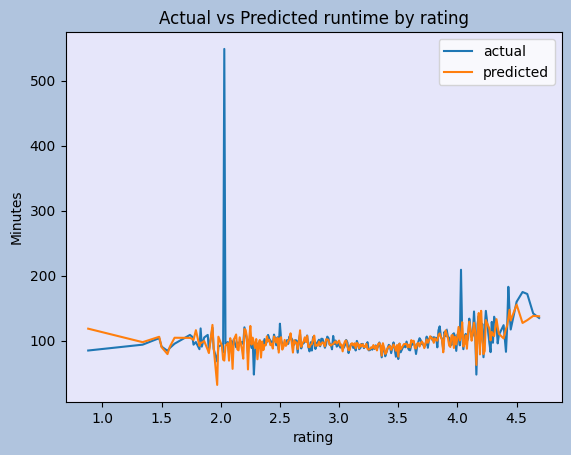

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df_test, x = 'rating', y ='actual', label = 'actual', errorbar=('ci', 0))
sns.lineplot(data =df_test, x = 'rating', y ='predictions_linear', label = 'predicted', errorbar=('ci', 0))
plt.title("Actual vs Predicted runtime by rating")
ax.set(ylabel="Minutes")
plt.show()

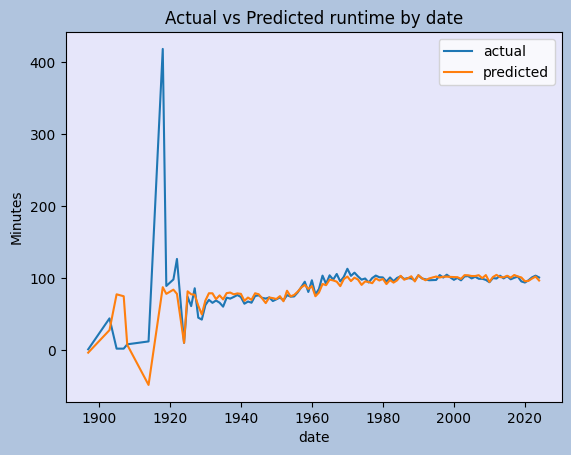

In [162]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df_test, x = 'date', y ='actual', label = 'actual', errorbar=('ci', 0))
sns.lineplot(data =df_test, x = 'date', y ='predictions_linear', label = 'predicted', errorbar=('ci', 0))
plt.title("Actual vs Predicted runtime by date")
ax.set(ylabel="Minutes")
plt.show()

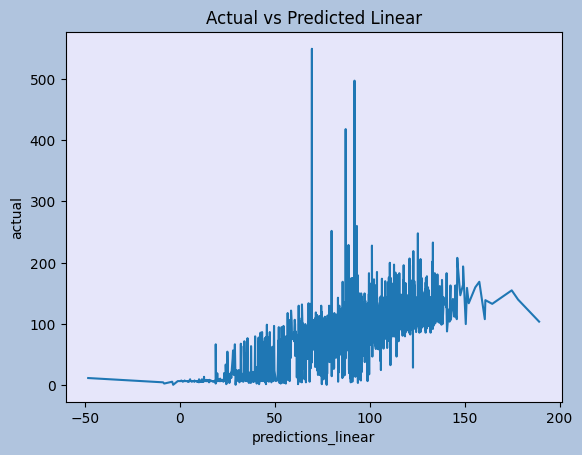

In [163]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
plt.title("Actual vs Predicted Linear")
sns.lineplot(data =df_test, x = 'predictions_linear', y ='actual', errorbar=('ci', 0))
plt.show()

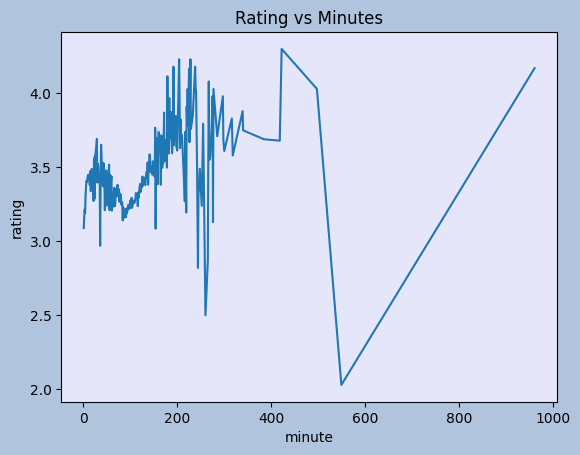

In [164]:

plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df, x = 'minute', y ='rating',errorbar=('ci', 0))
plt.title("Rating vs Minutes")
plt.show()


In [165]:
coefficient =[]
x=0
for y in model.coef_:
    for co in y:
        coefficient.append(co)
        x+=1
r=[]
for x in range(len(headers)):
    print(str(headers[x])+':'+str(coefficient[x]))
    if coefficient[x]<1:
        r.append(headers[x])
ind_var = [x for x in headers if x not in r]
ind_var.append('minute')
ind_var.append('date')
print(ind_var)
print(len(ind_var))

date:0.2210786823096938
rating:8.164310201161879
relCountry_Argentina:1.0807691939480808
relCountry_Australia:-0.7224218613390949
relCountry_Brazil:-0.3307701220706125
relCountry_Canada:-0.43069871075447896
relCountry_China:4.232495484583833
relCountry_Czechia:-1.2965091797205197
relCountry_Denmark:1.896811041490853
relCountry_France:3.3954989583892203
relCountry_Germany:4.139331191480288
relCountry_Greece:0.9654579302239874
relCountry_Hong Kong:1.4050641903431327
relCountry_India:4.708211520152288
relCountry_Italy:0.3622271546787399
relCountry_Japan:0.4067171552283835
relCountry_Mexico:-0.04231588445573564
relCountry_Netherlands:0.41193283837015393
relCountry_Philippines:-2.5077351677871125
relCountry_Poland:-0.09792620897465909
relCountry_Portugal:2.2075871118090795
relCountry_Russian Federation:-0.9655527323827968
relCountry_South Korea:3.359455670465092
relCountry_Spain:0.10987570152969539
relCountry_Sweden:0.6743249902799242
relCountry_Switzerland:-2.412065433938796
relCountry_Tur

In [166]:
x = df[ind_var]
y = df[dep_var]
x_train, x_test, y_train, y_test = train_test_split(x,y ,random_state=104, test_size=0.25, shuffle=True) 

In [167]:
model = LinearRegression()
model.fit(x_train, y_train)
print('Coefficients:', model.coef_)
print('intercept:', model.intercept_)
pred = model.predict(x_test)
print(pred)
df_test =x_test
df_test["predictions_linear"]=pred
df_test["actual"]= y_test["minute"]
print(x_test['predictions_linear'])

Coefficients: [[-4.43373063e-15  1.87350135e-14 -3.50830476e-14 -2.39253062e-14
   4.53023036e-15  5.43141920e-15  6.54793060e-15  9.99902743e-15
   2.17946321e-15 -8.22700528e-15 -1.00180281e-15 -1.82406173e-15
   1.37531046e-14  1.82735771e-14  9.87747481e-15  1.72651064e-14
   4.75321280e-14  3.07585988e-14  1.42144326e-15  2.68643614e-14
   1.70839905e-14  5.01595293e-15  8.47111552e-15  4.79712841e-14
   6.95041355e-14  2.23133686e-14 -5.24421815e-15  1.53143557e-14
   8.74018739e-15  2.00144466e-14  9.79484506e-15 -6.32086614e-14
   5.35477695e-14  6.95266327e-15  2.10115942e-14  5.91041972e-15
  -6.49220261e-16  6.76395788e-15 -1.60445523e-14 -1.47254171e-14
   1.26217396e-14  1.15366701e-14 -3.49667127e-14  2.08268732e-14
   7.64801633e-15  2.53714150e-14  1.55936191e-14  2.57541384e-14
  -3.13345270e-15  4.48767542e-15  4.42938600e-15 -7.75410552e-15
  -1.36460396e-16  4.94016720e-15  1.62842829e-14  2.10058750e-15
   7.40618504e-16 -4.06673393e-15 -5.20601357e-15  1.04536605e

In [168]:
print(mse("actual" ,"predictions_linear"))

9.355714031249036e-28


In [169]:
print(mae("actual","predictions_linear"))

2.2570585322707535e-14


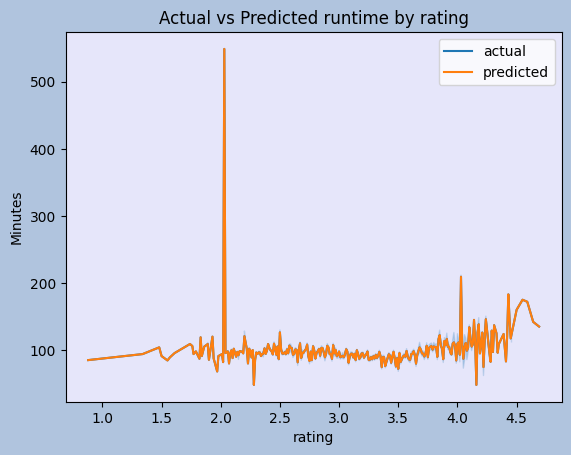

In [170]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df_test, x = 'rating', y ='actual', label = 'actual', errorbar=('ci', 40))
sns.lineplot(data =df_test, x = 'rating', y ='predictions_linear', label = 'predicted', errorbar=('ci', 0))
plt.title("Actual vs Predicted runtime by rating")
ax.set(ylabel="Minutes")
plt.show()

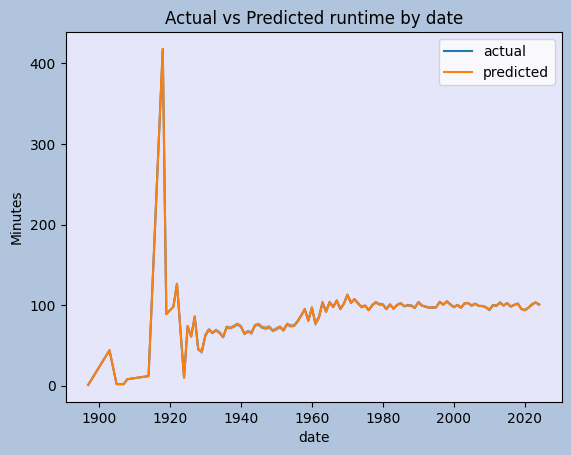

In [171]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df_test, x = 'date', y ='actual', label = 'actual', errorbar=('ci', 20))
sns.lineplot(data =df_test, x = 'date', y ='predictions_linear', label = 'predicted', errorbar=('ci', 0))
plt.title("Actual vs Predicted runtime by date")
ax.set(ylabel="Minutes")
plt.show()

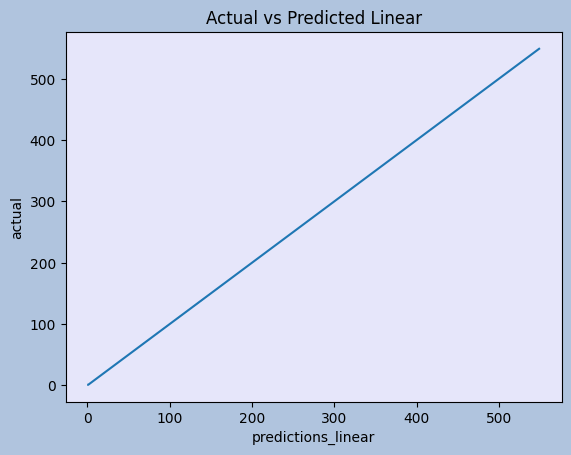

In [172]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
plt.title("Actual vs Predicted Linear")
sns.lineplot(data =df_test, x = 'predictions_linear', y ='actual', errorbar=('ci', 0))
plt.show()

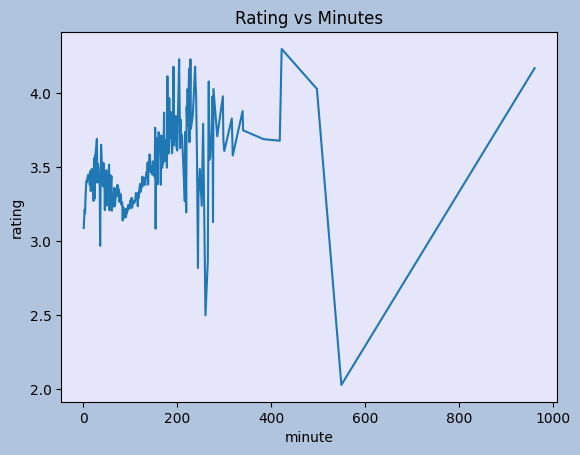

In [173]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(data =df, x = 'minute', y ='rating',errorbar=('ci', 0))
plt.title("Rating vs Minutes")
plt.show()